<a href="https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf"><img src="img/US_CDC_logo.svg" style="width:70px; float: left;"></a>    
<h1 style="padding-left:100px; border:none">COVID-19 Analysis</h1>
Centers for Disease Control and Prevention, COVID-19 Response. COVID-19 Case Surveillance Public Data Access, Summary, and Limitations (version date: October 31, 2020).

[Data Set](https://dev.socrata.com/foundry/data.cdc.gov/vbim-akqf)

In [158]:
import io
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from collections import OrderedDict
import mapclassify
import matplotlib.backends.backend_pdf
import matplotlib.font_manager as font_manager
import matplotlib as mpl
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [124]:
df = pd.read_csv('data/COVID-19_Case_Surveillance_Public_Use_Data.csv')
df = df.drop(columns=['pos_spec_dt','onset_dt','medcond_yn','age_group','sex','Race and ethnicity (combined)']) 
df = df.replace({'death_yn' : { 'No' : 0, 'Unknown' : 0, 'Missing' : 0, 'Yes' : 1 }})
df = df.replace({'icu_yn' : { 'No' : 0, 'Unknown' : 0, 'Missing' : 0, 'Yes' : 1 }})
df = df.replace({'hosp_yn' : { 'No' : 0, 'Unknown' : 0, 'Missing' : 0, 'Yes' : 1 }})
# df = df.replace({'sex' : { 'Male' : 1, 'Female' : 1, 'Unknown' : 1, 'Other' : 1 }})
df = df.replace({'current_status' : {'Laboratory-confirmed case' : 1, 'Probable Case' : 1 }})
# df = df.drop(columns=['hosp_yn', 'icu_yn'])
df['cdc_report_dt'] = pd.to_datetime(df['cdc_report_dt'])
df = df.set_index('cdc_report_dt')
print(df.dtypes)
print(df.head(5))
cases = df.shape[0]
print('n = ')
print(cases)
deaths = df['death_yn'].sum()
print('deaths = ')
print(deaths)



current_status    int64
hosp_yn           int64
icu_yn            int64
death_yn          int64
dtype: object
               current_status  hosp_yn  icu_yn  death_yn
cdc_report_dt                                           
2020-06-30                  1        0       0         0
2020-06-30                  1        0       0         0
2020-07-05                  1        0       0         0
2020-06-10                  1        0       0         0
2020-07-13                  1        0       0         0
n = 
5760066
deaths = 
158255


In [128]:
legend = 'Centers for Disease Control and Prevention, COVID-19 Response. \nCOVID-19 Case Surveillance Public Data Access, Summary, and Limitations\n(version date: October 31, 2020)'
legend = legend + '\nTotal Cases Logged = ' + '{:0,.0f}'.format(cases)
# legend = legend + '\nTotal Cases Logged = ' + '{:0,.0f}'.format(cases) + '\nTotal Deaths = ' + '{:0,.0f}'.format(n=deaths)
print(legend)

Centers for Disease Control and Prevention, COVID-19 Response. 
COVID-19 Case Surveillance Public Data Access, Summary, and Limitations
(version date: October 31, 2020)
Total Cases Logged = 5,760,066


In [69]:
print('sumdeaths')
sumdeaths_df = df.groupby('cdc_report_dt').agg(['sum']).reset_index()
print(sumdeaths_df.dtypes)
sumdeaths_df = sumdeaths_df.drop(columns=['current_status', 'hosp_yn', 'icu_yn'])
print(sumdeaths_df.head(5))

print('\nsumcases')
sumcases_df = df.groupby('cdc_report_dt').agg(['sum']).reset_index()
print(sumcases_df.dtypes)
sumcases_df = sumcases_df.drop(columns=['hosp_yn', 'icu_yn', 'death_yn'])
print(sumcases_df.head(5))

# summarized_df.plot(x='cdc_report_dt',xlabel ='report date',y='death_yn',ylabel ='deaths',kind='line')

sumdeaths
cdc_report_dt          datetime64[ns]
current_status  sum             int64
hosp_yn         sum             int64
icu_yn          sum             int64
death_yn        sum             int64
dtype: object
  cdc_report_dt death_yn
                     sum
0    2020-01-01        0
1    2020-01-02        0
2    2020-01-03        0
3    2020-01-05        0
4    2020-01-08        0
sumcases
cdc_report_dt          datetime64[ns]
current_status  sum             int64
hosp_yn         sum             int64
icu_yn          sum             int64
death_yn        sum             int64
dtype: object
  cdc_report_dt current_status
                           sum
0    2020-01-01             12
1    2020-01-02              3
2    2020-01-03              2
3    2020-01-05              1
4    2020-01-08              1


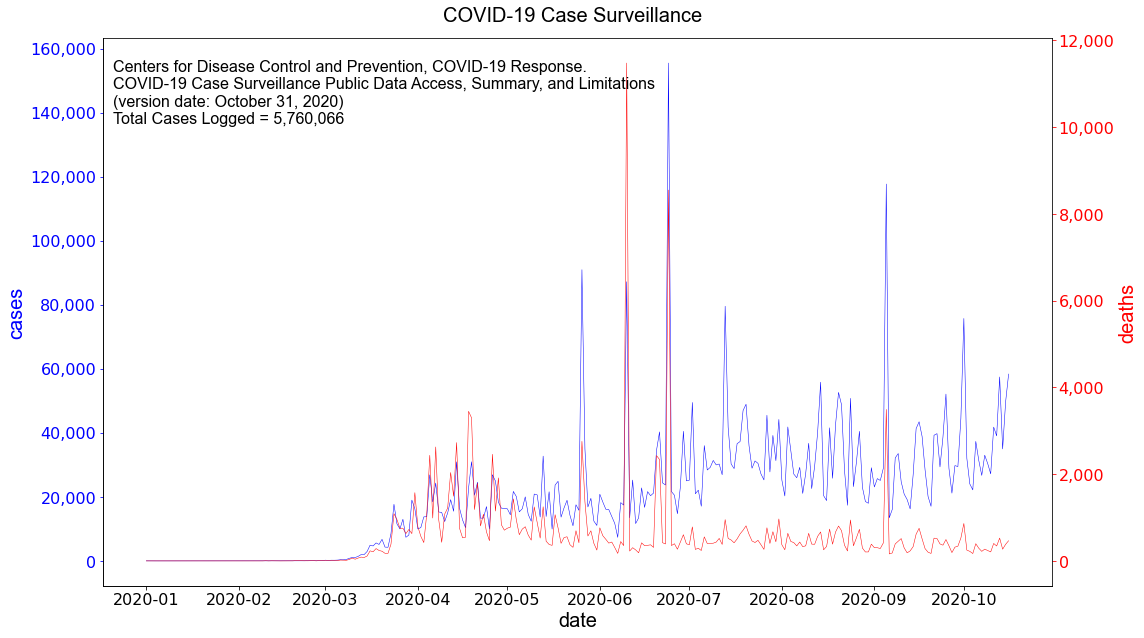

In [172]:
fig, ax = plt.subplots(figsize=(16,9))
fig.suptitle('COVID-19 Case Surveillance', fontname = 'Arial', size=20)
fig.text(0.01, 0.9, legend, ha = 'left', va = 'center', transform = ax.transAxes, fontname = 'Arial',size = 16)
ax.set_alpha(0.0)
sns.despine(top = True, right = True, left = False, bottom = False)
ax.plot(sumcases_df.cdc_report_dt, sumcases_df.current_status, color = 'blue', linewidth = .5)

ax.set_xlabel('date', color = 'black', fontname = 'Arial', size = 20)
ax.tick_params(labelsize = 16, color = 'black', axis = 'x', colors = 'black')

ax.set_ylabel('cases', color = 'blue', fontname = 'Arial', size = 20)
ax.tick_params(labelsize = 16, color = 'blue', axis = 'y', colors = 'blue')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2=ax.twinx()
ax2.set_ylabel('deaths', color = 'red', fontname = 'Arial', size = 20)
ax2.tick_params(labelsize = 16, color = 'red', axis = 'y', colors = 'red')
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2.plot(sumdeaths_df.cdc_report_dt, sumdeaths_df.death_yn, color = 'red', linewidth = .5)

plt.tight_layout()
plt.show()

ax.figure.savefig('img/covid-19_cases_deaths_OCT2020.svg', dpi=96, transparent=True)
